In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
 
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer,roc_curve,auc
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,roc_auc_score)
from sklearn.metrics import (mean_squared_error,mean_absolute_error)
   
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,StratifiedShuffleSplit,cross_val_score

import joblib
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin,ClassifierMixin

In [ ]:
def CalEER(y,y_pred_prob):
    fpr,tpr,thresholds = roc_curve(y,y_pred_prob)
    fnr = 1 - tpr
    eer_thresholds = thresholds[np.nanargmin(np.absolute((fnr-fpr)))]
    EER_fpr = fpr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER_fnr = fnr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER = (EER_fpr+EER_fnr)/2
    
    print "EER_fpr:",EER_fpr
    print "EER_fnr:",EER_fnr
    print "EER:",EER
    plt.plot(fpr,tpr,color="red")
    plt.plot(np.arange(0.0,1.0,0.01),1.0-np.arange(0.0,1.0,0.01),color="blue")
    plt.annotate(EER,xy=(EER,1-EER),xytext=(0.1+EER,1-EER),
                 arrowprops=dict(arrowstyle='->',connectionstyle='arc3'))
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.title("ROC curve for diabetes classifier")
    plt.xlabel("False Positive Rate (1-Specificity)")
    plt.ylabel("True positive Rate (Sensitivity)")
    plt.grid(True)
    plt.show()
    
    return EER,eer_thresholds

In [ ]:
def CalEER(y,y_pred_prob):
    fpr,tpr,thresholds = roc_curve(y,y_pred_prob)
    fnr = 1 - tpr
    eer_thresholds = thresholds[np.nanargmin(np.absolute((fnr-fpr)))]
    print ("eer_thresholds:",eer_thresholds)
    EER_fpr = fpr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER_fnr = fnr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER = (EER_fpr+EER_fnr)/2
    print ("EER_fpr:",EER_fpr*100)
    print ("EER_fnr:",EER_fnr*100)
    print ("EER:",EER*100)
    plt.plot(fpr,tpr,color="red")
    plt.plot(np.arange(0.0,1.0,0.01),1.0-np.arange(0.0,1.0,0.01),color="blue",linestyle = 'dotted')
    plt.annotate(round(EER,4),xy=(EER,1-EER),xytext=(0.1+EER,1-EER),
                 arrowprops=dict(arrowstyle='->',connectionstyle='arc3'))
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.title("ROC curve for cnn_vit classifier")
    plt.xlabel("False Accaptance Rate")
    plt.ylabel("True Accaptance Rate")
    plt.grid(True)
    plt.show()
    return EER,eer_thresholds

In [ ]:
def analysisModel(expected,predicted):
    accuracy = accuracy_score(expected, predicted)
    recall = recall_score(expected, predicted, average="binary")
    precision = precision_score(expected, predicted , average="binary")
    f1 = f1_score(expected, predicted , average="binary")
    cm = confusion_matrix(expected, predicted)
    TP = cm[1,1]
    FP = cm[0,1]
    TN = cm[0,0]
    FN = cm[1,0]
    print("TP:",TP,"FP:",FP,"TN:",TN,"FN:",FN)
    tpr = TP / float(TP+FN)
    fpr = FP / float(TN+FP)
    tnr = TN / float(TN+FP)
    print("fpr","%.3f" %fpr)
    print("tpr","%.3f" %tpr)
    print ("TNR|Specificity:",tnr)#TNR
    print ("FPR|1-Specificity",fpr)#FPR
    print("Accuracy:","%.3f" %accuracy)
    print("precision:","%.3f" %precision)
    print("recall","%.3f" %recall)
    print("f-score","%.3f" %f1)

In [ ]:
def EER_score(fpr,tpr):
    fnr = 1 - tpr
    EER_fpr = fpr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER_fnr = fnr[np.nanargmin(np.absolute((fnr-fpr)))]
    EER = (EER_fpr+EER_fnr)/2
    return EER

In [ ]:
def custom_auc(ground_truth,predictions):
    fpr,tpr,_ = roc_curve(ground_truth,predictions,pos_label=1)
    return EER_score(fpr,tpr)

In [ ]:
scoring_fnc = make_scorer(custom_auc,greater_is_better=True,needs_proba=True)   

In [ ]:
traindata = pd.read_csv('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/layer_extractor_features/Lcnn_T_400_400_100_800/tr_dat.csv', header=None)
devdata = pd.read_csv('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/layer_extractor_features/Lcnn_T_400_400_100_800/dev_dat.csv',header=None)
testdata = pd.read_csv('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/layer_extractor_features/Lcnn_T_400_400_100_800/tr_dat.csv', header=None)

In [ ]:
num_classes = 2
fdim = 66
X = traindata.iloc[:,2:fdim]
Y = traindata.iloc[:,1]

D = devdata.iloc[:,2:fdim]
L = devdata.iloc[:,1]

C = testdata.iloc[:,1]
T = testdata.iloc[:,2:fdim]

In [ ]:
# scaler = Normalizer().fit(X)
# trainX = scaler.transform(X)

# scaler = Normalizer().fit(T)
# testT = scaler.transform(T)
# print(testT)

traindata = np.array(X)
trainlabel = np.array(Y)
devdata = np.array(D)
devlabel = np.array(L)
traindata = np.concatenate((traindata,devdata))
trainlabel = np.concatenate((trainlabel,devlabel)) 
testdata = np.array(T)
testlabel = np.array(C)


expected = testlabel

In [ ]:
np.array(np.where(trainlabel==1)).reshape(-1)

array([   0,    1,    2, ..., 1504, 1505, 1506])

In [ ]:
np.array(np.where(trainlabel==0)).reshape(-1)

array([1507, 1508, 1509, ..., 3011, 3012, 3013])

In [ ]:
print(testdata.shape)

(13306, 126)


In [ ]:
print(traindata.shape)

(3014, 126)


******************************GMM******************************
eer_thresholds: 46355.95585791507
EER_fpr: 0.0
EER_fnr: 0.0
EER: 0.0


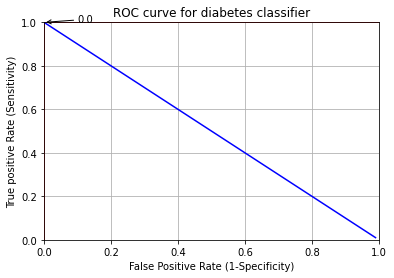

eer_thresholds: 70613.39470977272
EER_fpr: 11.750499666888741
EER_fnr: 11.710323574730353
EER: 11.730411620809548


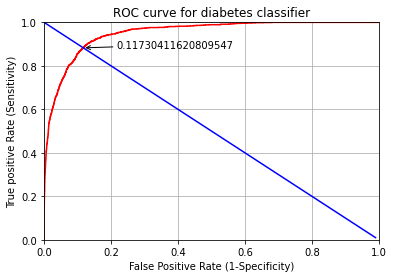

TP: 1146 FP: 1410 TN: 10598 FN: 152
fpr 0.117
tpr 0.883
TNR|Specificity: 0.8825782811459028
FPR|1-Specificity 0.11742171885409727
Accuracy: 0.883
precision: 0.448
recall 0.883
f-score 0.595
***************************************************************


In [ ]:
#GMM/single Training 8.4 ,11.9
print("******************************GMM******************************")
genuineTrainDataIndex = np.array(np.where(trainlabel==1)).reshape(-1)
spoofTrainDataIndex = np.array(np.where(trainlabel==0)).reshape(-1)
genuineTrainData = traindata[genuineTrainDataIndex,:]
spoofTrainData = traindata[spoofTrainDataIndex,:]

genuineModel = GaussianMixture(n_components=512,covariance_type='full',init_params = 'kmeans', max_iter = 50,random_state=0)
spoofModel = GaussianMixture(n_components=512,covariance_type='full',init_params = 'kmeans', max_iter = 50,random_state=0)

#genuine  
genuineModel.fit(genuineTrainData)  
#spoof 
spoofModel.fit(spoofTrainData)
joblib.dump(genuineModel,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/gmm/genuineGMM.pkl')
joblib.dump(spoofModel,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/gmm/spoofGMM.pkl')
# dev predictions
dev_genuine_prob = genuineModel.score_samples(devdata)
dev_spoof_prob = spoofModel.score_samples(devdata)
dev_gmm_prob = dev_genuine_prob - dev_spoof_prob
_,eer_threholds=CalEER(devlabel,dev_gmm_prob)
# eval predictions
genuine_y_prob = genuineModel.score_samples(testdata)
spoof_y_prob = spoofModel.score_samples(testdata)
gmm_y_prob = genuine_y_prob - spoof_y_prob
_,eer_threholds=CalEER(expected,gmm_y_prob)
# summarize the fit of the model
gmm_predicted = np.where(gmm_y_prob>eer_threholds, 1, 0)
analysisModel(expected,gmm_predicted)  
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/gmm/predictedGMM.txt', gmm_predicted, fmt='%01d')
print("***************************************************************")

In [ ]:
def GridSearchTrainModel(model,parameters,scoring_fnc,splits,rate):
    grid = GridSearchCV(model,parameters,scoring=scoring_fnc,cv=StratifiedShuffleSplit(n_splits=splits,test_size=rate,random_state=0))
    grid = grid.fit(traindata,trainlabel)
    CLF = grid.best_estimator_
    print('Best Parameters found on CV:',grid.best_params_)
    return CLF
def DataAnalysis(CLF):
    print('-----devSet-----')
    dev_y_prob = CLF.predict_proba(devdata)
    CalEER(devlabel,dev_y_prob[:,1])
    print('-----evalSet----')
    y_prob = CLF.predict_proba(testdata)
    CalEER(expected,y_prob[:,1])

    predicted = CLF.predict(testdata)
    analysisModel(expected,predicted)
    return predicted

*********************Logistic Regression***********************
Best Parameters found on CV: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}
-----devSet-----
eer_thresholds: 0.49197767547235477
EER_fpr: 6.421052631578947
EER_fnr: 6.184210526315792
EER: 6.302631578947369


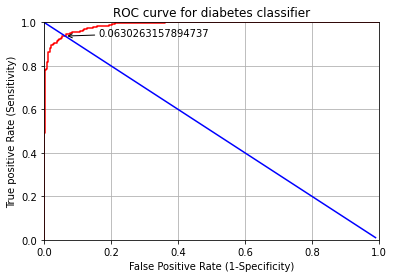

-----evalSet----
eer_thresholds: 0.7392922735744594
EER_fpr: 10.751165889407062
EER_fnr: 10.708782742681045
EER: 10.729974316044052


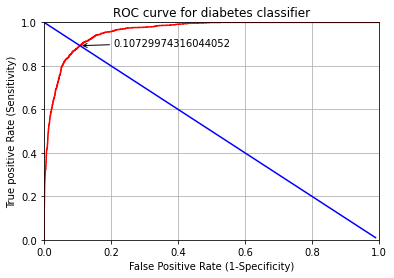

TP: 1222 FP: 1882 TN: 10126 FN: 76
fpr 0.157
tpr 0.941
TNR|Specificity: 0.8432711525649567
FPR|1-Specificity 0.1567288474350433
Accuracy: 0.853
precision: 0.394
recall 0.941
f-score 0.555
***************************************************************


In [ ]:
#7.07,10.7
print("*********************Logistic Regression***********************")
model = LogisticRegression(n_jobs=1)
#CLF = joblib.load('./ML_model_parameters/LR.pkl')
parameters = {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty': ['l2'], 'solver': ['newton-cg'],'C':(0.1,0.3,0.6,1,10,30,60,100),'max_iter':range(50,110,10)}#C=inverse of regularazation
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.1)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/LogisticRegression/predictedLR.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/LogisticRegression/LR.pkl')
print("***************************************************************")

*****************************SVM*******************************
Best Parameters found on CV: {'C': 60, 'gamma': 0.0001, 'kernel': 'rbf'}
-----devSet-----
eer_thresholds: 0.5
EER_fpr: 6.526315789473684
EER_fnr: 6.710526315789478
EER: 6.618421052631581


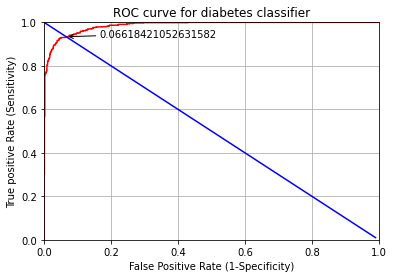

-----evalSet----
eer_thresholds: 0.7320696609909779
EER_fpr: 10.8927381745503
EER_fnr: 10.862865947611711
EER: 10.877802061081004


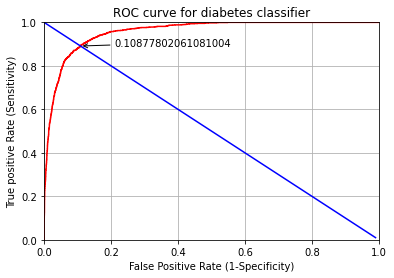

TP: 1207 FP: 1831 TN: 10177 FN: 91
fpr 0.152
tpr 0.930
TNR|Specificity: 0.8475183211192538
FPR|1-Specificity 0.15248167888074618
Accuracy: 0.856
precision: 0.397
recall 0.930
f-score 0.557
***************************************************************


In [ ]:
#7.07,11.16
print("*****************************SVM*******************************")
model = SVC(probability=True)
#CLF = joblib.load('./ML_model_parameters/SVM.pkl')
parameters = {'kernel':('linear','rbf'),'C':(0.1,0.3,1,10,30,60,100,1000),'gamma':(1e-2,1e-3,1e-4)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.2)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/svm/predictedSVM.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/svm/SVM.pkl')
print("***************************************************************")

****************************Random Forest**********************
Best Parameters found on CV: {'max_depth': 16, 'n_estimators': 10}
-----devSet-----
eer_thresholds: 0.5
EER_fpr: 0.42105263157894735
EER_fnr: 0.1315789473684159
EER: 0.27631578947368163


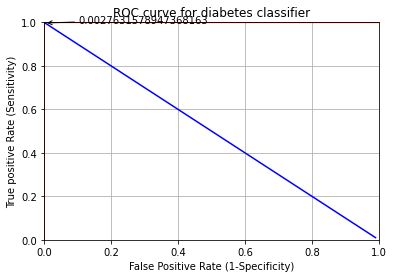

-----evalSet----
eer_thresholds: 0.8
EER_fpr: 9.601932045303132
EER_fnr: 11.864406779661019
EER: 10.733169412482074


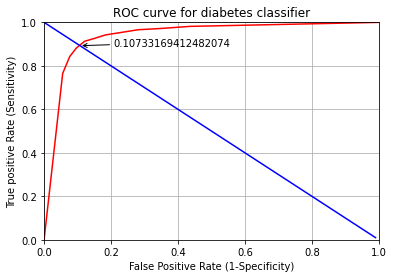

TP: 1201 FP: 1780 TN: 10228 FN: 97
fpr 0.148
tpr 0.925
TNR|Specificity: 0.8517654896735509
FPR|1-Specificity 0.14823451032644902
Accuracy: 0.859
precision: 0.403
recall 0.925
f-score 0.561
***************************************************************


In [ ]:
#RF:7.71%,10.4%
print("****************************Random Forest**********************")    
model = RandomForestClassifier(random_state=0)
#CLF = joblib.load('./ML_model_parameters/RF.pkl')
parameters = {'n_estimators':range(10,101,10),'max_depth':range(10,21)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,5,0.3)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/random_forest/predictedRF.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/random_forest/RF.pkl')
print("***************************************************************")

***********************AdaBoost********************************
Best Parameters found on CV: {'learning_rate': 1.05, 'n_estimators': 10}
-----devSet-----
eer_thresholds: 0.49957990168409033
EER_fpr: 4.736842105263158
EER_fnr: 5.921052631578949
EER: 5.328947368421054


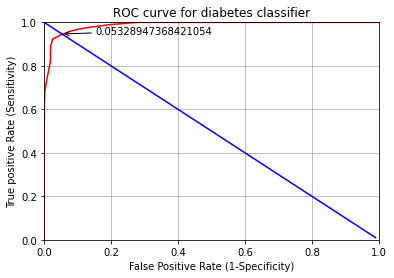

-----evalSet----
eer_thresholds: 0.5487223300575295
EER_fpr: 12.99966688874084
EER_fnr: 12.711864406779661
EER: 12.85576564776025


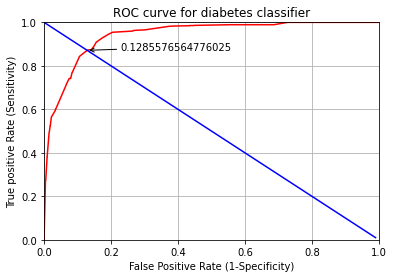

TP: 1209 FP: 2124 TN: 9884 FN: 89
fpr 0.177
tpr 0.931
TNR|Specificity: 0.8231179213857428
FPR|1-Specificity 0.17688207861425717
Accuracy: 0.834
precision: 0.363
recall 0.931
f-score 0.522
***************************************************************


In [ ]:
#AdaBoost:8.89%,11.82
print("***********************AdaBoost********************************")
model = AdaBoostClassifier()
#CLF = joblib.load('./ML_model_parameters/AdaBoost.pkl')
parameters = {'n_estimators':range(10,101,10),'learning_rate':np.arange(0.05,1.1,0.05)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.1)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/Adaboost/predictedABoost.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/Adaboost/AdaBoost.pkl')
print("***************************************************************")

In [ ]:
#Best Parameters found on CV: {'n_estimators': 70, 'subsample': 0.6, 'learning_rate': 0.3, 'max_depth': 8}
print("*****************************GBDT******************************")
model = GradientBoostingClassifier(max_features='auto')
#CLF = joblib.load('./ML_model_parameters/GBDT.pkl')
parameters = {'learning_rate':np.arange(0.05,0.5,0.05),'n_estimators':range(10,101,10),
              'max_depth':range(4,21,2),'subsample':np.arange(0.05,1,0.05)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.1)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/GBDT/predictedGBDT.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/GBDT/GBDT.pkl')
print("***************************************************************")


*****************************GBDT******************************


**************************lightGBM****************************
Best Parameters found on CV: {'learning_rate': 0.05, 'n_estimators': 10, 'num_leaves': 32}
-----devSet-----
eer_thresholds: 0.48085250001790614
EER_fpr: 2.526315789473684
EER_fnr: 2.500000000000002
EER: 2.5131578947368434


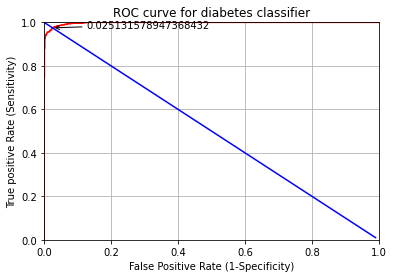

-----evalSet----
eer_thresholds: 0.5913249581488887
EER_fpr: 10.64290473017988
EER_fnr: 10.631741140215711
EER: 10.637322935197796


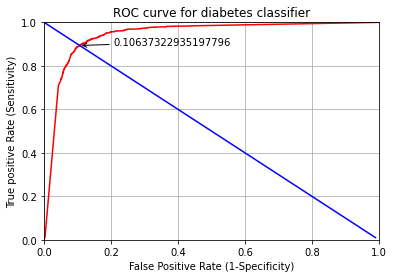

TP: 1205 FP: 1857 TN: 10151 FN: 93
fpr 0.155
tpr 0.928
TNR|Specificity: 0.8453530979347101
FPR|1-Specificity 0.1546469020652898
Accuracy: 0.853
precision: 0.394
recall 0.928
f-score 0.553
***************************************************************


In [ ]:
#8.71,11.07
#Best Parameters found on CV: {'n_estimators': 50, 'num_leaves': 64, 'learning_rate': 0.10000000000000001}
print("**************************lightGBM****************************")
import lightgbm as lgb
#train_data = lgb.Dataset(traindata,label=trainlabel)
model = lgb.LGBMClassifier(n_jobs=2,metric='auc')
#CLF = joblib.load('./ML_model_parameters/LGBM.pkl')
parameters = {'num_leaves':(32,64,128,256,512,1024),'learning_rate':np.arange(0.05,0.5,0.05),
              'n_estimators':range(10,101,10)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.2)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/lightGBM/predictedLGBM.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/lightGBM/LGBM.pkl')
print("***************************************************************")

*************************Decision Tree*************************
Best Parameters found on CV: {'max_depth': 9}
DecisionTreeClassifier(max_depth=9, random_state=0)
-----devSet-----
eer_thresholds: 0.3333333333333333
EER_fpr: 0.8421052631578947
EER_fnr: 1.3157894736842146
EER: 1.0789473684210547


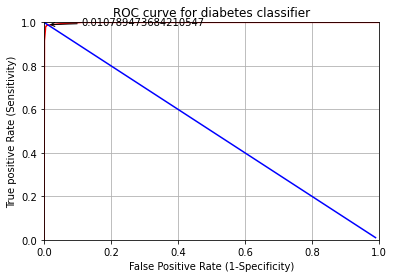

-----evalSet----
eer_thresholds: 0.9886363636363636
EER_fpr: 14.63191205862758
EER_fnr: 14.252696456086289
EER: 14.442304257356936


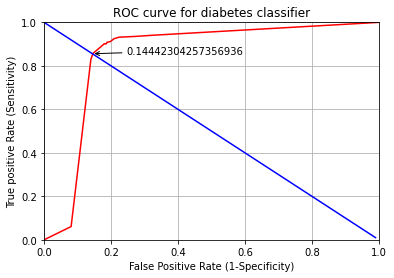

TP: 1171 FP: 2234 TN: 9774 FN: 127
fpr 0.186
tpr 0.902
TNR|Specificity: 0.8139573617588275
FPR|1-Specificity 0.18604263824117256
Accuracy: 0.823
precision: 0.344
recall 0.902
f-score 0.498
***************************************************************


In [ ]:
#11.85,17.91
#Best Parameters found on CV: {'max_depth': 3}
print("*************************Decision Tree*************************")
model = DecisionTreeClassifier(random_state=0)
#CLF = joblib.load('./ML_model_parameters/DT.pkl')
parameters = {'max_depth':range(3,10)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.1)
print(CLF)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/desision_tree/predictedDT.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/desision_tree/DT.pkl')
print("***************************************************************")

*****************************KNN*******************************
Best Parameters found on CV: {'n_neighbors': 1}
KNeighborsClassifier(n_jobs=2, n_neighbors=1)
-----devSet-----
eer_thresholds: 1.0
EER_fpr: 0.0
EER_fnr: 0.0
EER: 0.0


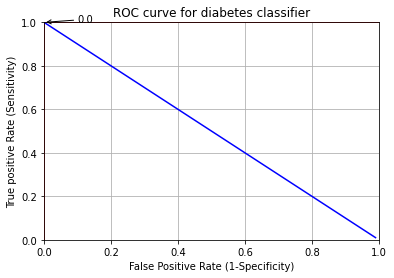

-----evalSet----
eer_thresholds: 1.0
EER_fpr: 17.854763491005997
EER_fnr: 7.318952234206466
EER: 12.586857862606232


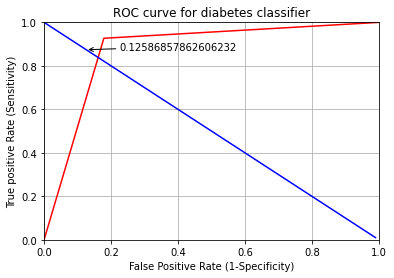

TP: 1203 FP: 2144 TN: 9864 FN: 95
fpr 0.179
tpr 0.927
TNR|Specificity: 0.82145236508994
FPR|1-Specificity 0.17854763491005995
Accuracy: 0.832
precision: 0.359
recall 0.927
f-score 0.518
***************************************************************


In [ ]:
#8.82,12.31
#Best Parameters found on CV: {'n_neighbors': 10}
print("*****************************KNN*******************************")
model = KNeighborsClassifier(algorithm='auto',n_jobs=2)#'algorithm':('ball_tree','kd_tree','brute')
#CLF = joblib.load('./ML_model_parameters/KNN.pkl')
parameters = {'n_neighbors':range(1,11)}
CLF=GridSearchTrainModel(model,parameters,scoring_fnc,10,0.1)
print(CLF)
predicted=DataAnalysis(CLF)
np.savetxt('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/KNN/predictedKNN.txt', predicted, fmt='%01d')
# save model
joblib.dump(CLF,'/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/KNN/KNN.pkl')
print("***************************************************************")

In [ ]:
#7.36,10.6
lr_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/LogisticRegression/LR.pkl')
svm_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/svm/SVM.pkl')
rf_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/random_forest/RF.pkl')
adaboost_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/Adaboost/AdaBoost.pkl')
lGbm_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/lightGBM/LGBM.pkl')
DT_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/desision_tree/DT.pkl')
Knn_model=joblib.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ML_approach/KNN/KNN.pkl')
eval_pred=[]
dev_pred=[]
for model in [lr_model,svm_model,rf_model,adaboost_model,lGbm_model,DT_model,Knn_model]:
    eval_pred.append(pd.Series(model.predict_proba(testdata)[:,1]))
    dev_pred.append(pd.Series(model.predict_proba(devdata)[:,1]))
final_eval_prediction=pd.concat(eval_pred,axis=1).mean(axis=1)
final_dev_prediction=pd.concat(dev_pred,axis=1).mean(axis=1)

In [ ]:
final_eval_prediction

0        0.038523
1        0.046480
2        0.909139
3        0.035282
4        0.122227
           ...   
13301    0.959070
13302    0.034214
13303    0.379318
13304    0.048731
13305    0.550312
Length: 13306, dtype: float64

eer_thresholds: 0.6946634525667124
EER_fpr: 10.701199200532978
EER_fnr: 10.708782742681045
EER: 10.704990971607012


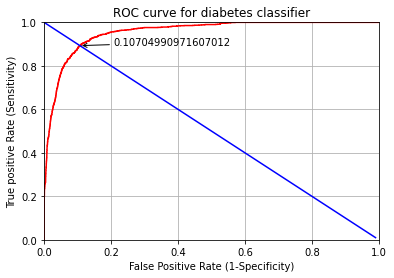

(0.10704990971607012, 0.6946634525667124)

In [ ]:
CalEER(expected,final_eval_prediction)

eer_thresholds: 0.46835944583465017
EER_fpr: 0.9473684210526316
EER_fnr: 1.0526315789473717
EER: 1.0000000000000016


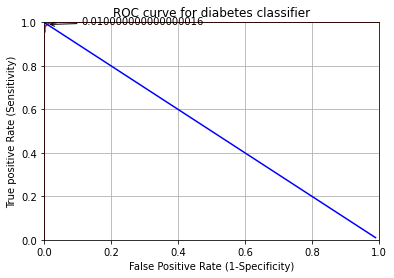

(0.010000000000000016, 0.46835944583465017)

In [ ]:
CalEER(devlabel,final_dev_prediction)